In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### load dataset

In [2]:
df = pd.read_csv("Salary by Education.csv")
df.head()

,Degree Level,Nationality,Gender,Year Quarter,Salary,Currency
0,Primary,NonSaudi,Female,2017 Q1,1590,SAR
1,Primary,NonSaudi,Male,2017 Q1,2173,SAR
2,Primary,Saudi,Female,2017 Q1,4172,SAR
3,Primary,Saudi,Male,2017 Q1,6172,SAR
4,Primary,NonSaudi,Female,2017 Q2,1597,SAR


### explore data

In [3]:
df.shape

(504, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Degree Level  504 non-null    object
 1   Nationality   504 non-null    object
 2   Gender        504 non-null    object
 3   Year Quarter  504 non-null    object
 4   Salary        504 non-null    int64 
 5   Currency      504 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.8+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Salary,504.0,8950.031746,6372.635277,1331.0,4194.0,7890.5,12448.75,35622.0


In [6]:
df['Gender'].value_counts()

Female    252
Male      252
Name: Gender, dtype: int64

In [7]:
df['Degree Level'].value_counts()

Primary          72
Secondary        72
Intermediate     72
Bachelor         72
Diploma          72
Doctorate        72
Master Degree    72
Name: Degree Level, dtype: int64

In [8]:
df['Nationality'].value_counts()

NonSaudi    252
Saudi       252
Name: Nationality, dtype: int64

In [9]:
df['Year Quarter'].value_counts()

2017 Q1    28
2017 Q2    28
2021 Q1    28
2020 Q4    28
2020 Q3    28
2020 Q2    28
2020 Q1    28
2019 Q4    28
2019 Q3    28
2019 Q2    28
2019 Q1    28
2018 Q4    28
2018 Q3    28
2018 Q2    28
2018 Q1    28
2017 Q4    28
2017 Q3    28
2021 Q2    28
Name: Year Quarter, dtype: int64

In [10]:
df['Currency'].value_counts()

SAR    504
Name: Currency, dtype: int64

## clean data

### check missing value

In [11]:
df.isnull().sum()

Degree Level    0
Nationality     0
Gender          0
Year Quarter    0
Salary          0
Currency        0
dtype: int64

no found missing value

### check duplicate values

In [12]:
df.duplicated().sum()

0

no found duplicated value

## start analsyis

### Highest Salary

In [13]:
df[df['Salary'] == df['Salary'].max()]

,Degree Level,Nationality,Gender,Year Quarter,Salary,Currency
427,Doctorate,Saudi,Male,2021 Q1,35622,SAR


### Lowest Salary

In [14]:
df[df['Salary'] == df['Salary'].min()]

,Degree Level,Nationality,Gender,Year Quarter,Salary,Currency
60,Primary,NonSaudi,Female,2020 Q4,1331,SAR


array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

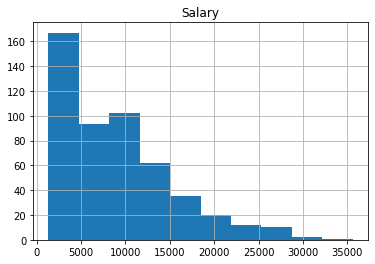

In [15]:
df.hist()

## Questions

### Comparison of education and salary salaries

In [16]:
x=df.groupby('Degree Level')['Salary'].mean()
q1=pd.DataFrame(x)
q1.reset_index(inplace=True)
q1

,Degree Level,Salary
0,Bachelor,9535.555556
1,Diploma,7036.694444
2,Doctorate,19835.458333
3,Intermediate,4101.527778
4,Master Degree,13797.875000
5,Primary,3569.041667
6,Secondary,4774.069444


Text(0, 0.5, 'Salary')

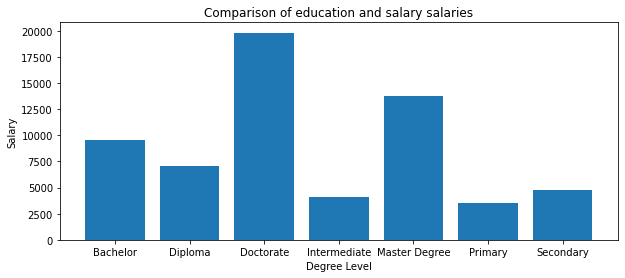

In [17]:
plt.figure(figsize=(10,4))
plt.bar(q1['Degree Level'],q1['Salary'])
plt.title("Comparison of education and salary salaries")
plt.xlabel("Degree Level")
plt.ylabel("Salary")

### Comparison of type and salary

In [18]:
x=df.groupby('Gender')['Salary'].mean()
q2=pd.DataFrame(x)
q2.reset_index(inplace=True)
q2

,Gender,Salary
0,Female,7664.559524
1,Male,10235.503968


([<matplotlib.patches.Wedge at 0x1e403f0c040>,
 [Text(0.2460707982302205, 1.0721236692930263, 'Female'),
  Text(-0.24607059747129198, -1.0721237153706291, 'Male')],
 [Text(0.13422043539830206, 0.584794728705287, '42.8%'),
  Text(-0.13422032589343197, -0.5847947538385249, '57.2%')])

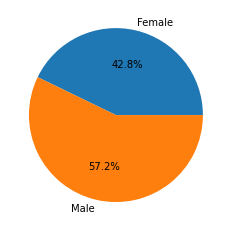

In [19]:
plt.pie(q2['Salary'],labels=q2['Gender'],autopct="%1.1f%%")

###  Comparison of nationality and salary

In [20]:
x=df.groupby('Nationality')['Salary'].mean()
q3=pd.DataFrame(x)
q3.reset_index(inplace=True)
q3

,Nationality,Salary
0,NonSaudi,6663.587302
1,Saudi,11236.476190


([<matplotlib.patches.Wedge at 0x1e403f58940>,
 [Text(0.429664616678769, 1.0126145945888232, 'NonSaudi'),
  Text(-0.4296646166787691, -1.0126145945888232, 'Saudi')],
 [Text(0.2343625181884194, 0.5523352334120853, '37.2%'),
  Text(-0.23436251818841947, -0.5523352334120852, '62.8%')])

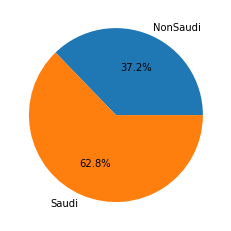

In [21]:
plt.pie(q3['Salary'],labels=q3['Nationality'],autopct="%1.1f%%")

### compariosn between salries by quarter year

In [22]:
x=df.groupby(['Year Quarter'])['Salary'].mean()
q4=pd.DataFrame(x)
q4.reset_index(inplace=True)
q4

,Year Quarter,Salary
0,2017 Q1,8777.821429
1,2017 Q2,8644.857143
2,2017 Q3,8622.250000
3,2017 Q4,8427.678571
4,2018 Q1,8551.678571
5,2018 Q2,9013.642857
6,2018 Q3,9062.928571
7,2018 Q4,8576.964286
8,2019 Q1,8865.107143
9,2019 Q2,9189.892857


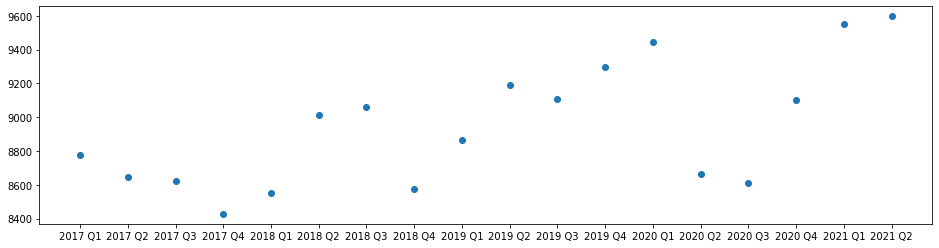

In [23]:
plt.figure(figsize=(16,4))
plt.scatter(q4['Year Quarter'],q4['Salary'])

## Conclusion

<span>Saudi salaries are more than others</span><br>
<span>Men's salaries are more than women's</span><br>
<span>The higher a person's rank is in education, the higher his rank will certainly increase</span><br>
<span>PhD is the highest education salary in the price</span>